Code:3 Train a Model with Different Optimizers

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8797 - loss: 0.4314 - val_accuracy: 0.9592 - val_loss: 0.1398
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9638 - loss: 0.1243 - val_accuracy: 0.9675 - val_loss: 0.1059
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9761 - loss: 0.0784 - val_accuracy: 0.9706 - val_loss: 0.0946
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9822 - loss: 0.0561 - val_accuracy: 0.9752 - val_loss: 0.0825
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9866 - loss: 0.0444 - val_accuracy: 0.9753 - val_loss: 0.0830
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9761 - val_loss: 0.0779
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9924 - loss: 0.0255 - val_accuracy: 0.9776 - val_loss: 0.0744
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9934 - loss: 0.02

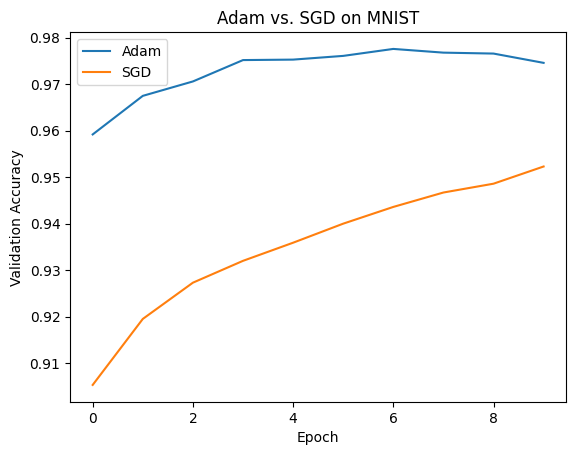

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model architecture
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Train and evaluate with a given optimizer
def train_model(optimizer, optimizer_name):
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
    return history

# Train models with Adam and SGD
history_adam = train_model(tf.keras.optimizers.Adam(), "Adam")
history_sgd = train_model(tf.keras.optimizers.SGD(), "SGD")

# Plot accuracy comparison
plt.plot(history_adam.history['val_accuracy'], label="Adam")
plt.plot(history_sgd.history['val_accuracy'], label="SGD")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Adam vs. SGD on MNIST")
plt.legend()
plt.show()
